In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def visualize(**images):
    """
    PLot images in one row.
    Parameters
    ----------
    **images : ndarray
        Images sent for plotting.
    """
    n = len(images)
    plt.figure(figsize=(12, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([]) 
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image, cmap = plt.get_cmap(name = 'gray'))
    plt.show()

In [ ]:
image = cv2.imread('/content/filler.jpg')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kernel = np.ones((3,3), np.uint8)

thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)[1]
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

In [ ]:
markers = cv2.connectedComponents(sure_fg)[1]
markers = markers + 1
markers[unknown==255] = 0

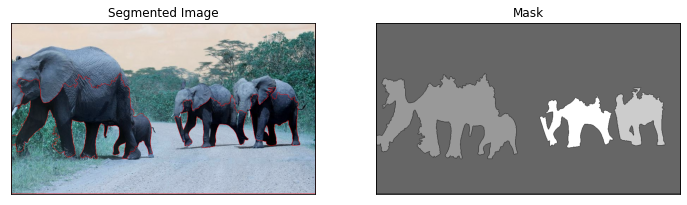

In [ ]:
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]
visualize(
    segmented_image = image,
    mask = markers
)